<a href="https://colab.research.google.com/github/Cyberman1000/WRAP_IT_Final_Project_DataSet/blob/main/WRAP_IT_Python_for_Data_Analytics_FinalProject_Code_Johnathan_Vera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [1]:
!pip3 install matplotlib --upgrade

In [2]:
!pip3 install numpy --upgrade

In [8]:
# Define Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Negate SettingWithCopy Warning from Pandas Library
pd.options.mode.chained_assignment = None

In [9]:
# Obtain CSV data
original_data = pd.read_csv("https://raw.githubusercontent.com/Cyberman1000/WRAP_IT_Final_Project_DataSet/main/Headcount_Enrollment_by_Student_Level_and_Student_Load_by_Institutions_of_the_State_University_of_New_York__Beginning_Fall_2011.csv")

In [18]:
# Copy original CSV data
copy_data = pd.DataFrame(original_data)

# Filter data from the copied original data
filtered_data = pd.DataFrame(copy_data)

# Drop all columns that will not be used when creating the desired graphs
filtered_data.drop(["College or Institution Type", "Undergraduate Part-Time", "Graduate Full-Time", "Graduate Part-Time"], axis=1, inplace=True)

# Select all the rows that contain the year 2021
indexName1 = filtered_data[filtered_data["Year"] <= 2020].index

# Drop all the rows that contain the 2021 and below
filtered_data.drop(indexName1, inplace=True)

# From the filtered data so far, drop any row that contains a NaN value
filtered_data = filtered_data.dropna()

# Print the filtered data
print(filtered_data.to_string(index=False, header=True))

# filtered_data.shape

 Year Term        College or Institution Name  Undergraduate Full-Time
 2021 Fall                             Albany                  11792.0
 2021 Fall                    Alfred-Ceramics                    406.0
 2021 Fall                         Binghamton                  13966.0
 2021 Fall                       Buffalo Univ                  19773.0
 2021 Fall                       Cornell Stat                   5933.0
 2021 Fall                  Downstate Medical                    174.0
 2021 Fall Environmental Science and Forestry                   1278.0
 2021 Fall                        Stony Brook                  16678.0
 2021 Fall                          SUNY Poly                   1734.0
 2021 Fall                    Upstate Medical                    131.0
 2021 Fall                          Brockport                   4880.0
 2021 Fall                      Buffalo State                   5384.0
 2021 Fall                           Cortland                   5816.0
 2021 

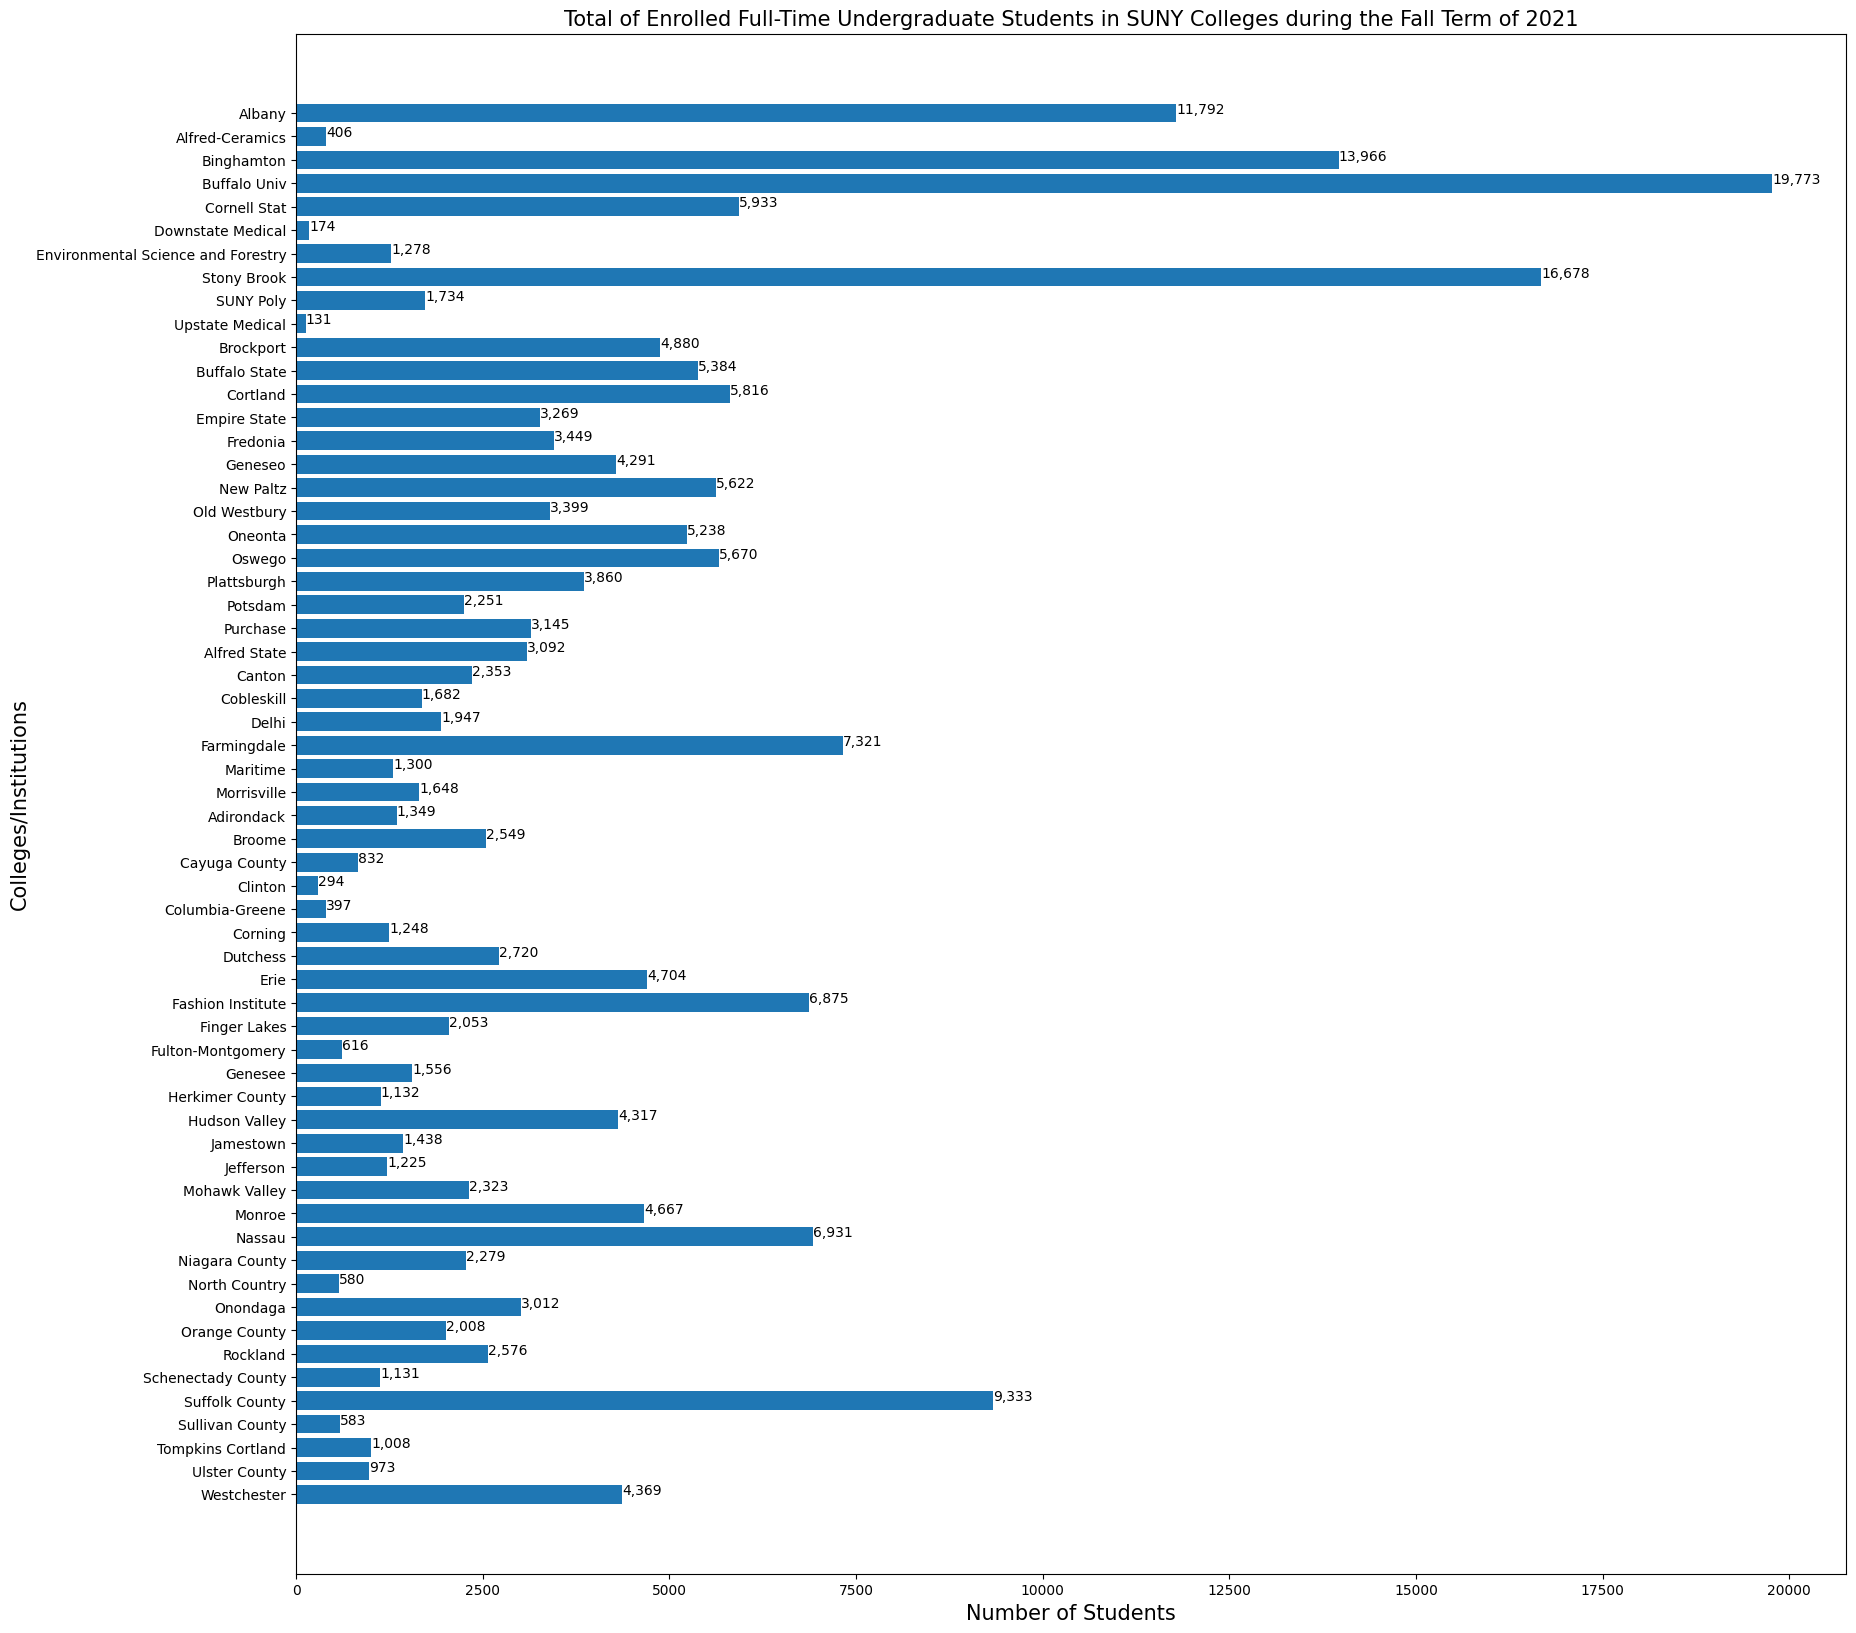

In [19]:
# Create a graph that will display the all the filtered data with the names of the institutions with their respective values

# Create a dataframe using the filtered data
df1 = pd.DataFrame(filtered_data)

# Get x and y values
y1 = df1["College or Institution Name"]
x1 = df1["Undergraduate Full-Time"]

# Increase the size of the figure
plt.figure(figsize=(20,20))

# Create a horizontal bar graph with x and y axis determined
plt.barh(y1,x1)
plt.title("Total of Enrolled Full-Time Undergraduate Students in SUNY Colleges during the Fall Term of 2021", fontsize=15)
plt.ylabel("Colleges/Institutions", fontsize=15)
plt.xlabel("Number of Students", fontsize=15)

# Get the current y-axis and reverse it so it would match the filtered table in alphabetical order
plt.gca().invert_yaxis()

# Display the exact number of students in each college at the end of each bar
for numOfStudents, value in enumerate(x1):
  plt.text(value, numOfStudents, "{:,}".format(round(value)))

plt.show()

In [20]:
# Create a second data frame by obtaining filtered data to display the statistical measures of the number of students
df2 = pd.DataFrame(filtered_data)

# Get Statistical Data from the second data frame(Average/Mean, Median, Mode, Maximum, and Minimum values), but round the values to the nearest single digit
mean_number_of_students = round(df2["Undergraduate Full-Time"].mean())
median_number_of_students = round(df2["Undergraduate Full-Time"].median())
mode_number_of_students = round(df2["Undergraduate Full-Time"].mode()[0])
max_number_of_students = round(df2["Undergraduate Full-Time"].max())
min_number_of_students = round(df2["Undergraduate Full-Time"].min())

print("Statistical Measures of Enrolled Undergraduate Full-Time College Students in New York during the Fall Term of 2021")
print("\nAverage # of Students: ", mean_number_of_students)
print("\nMedian # of Students:  ", median_number_of_students)
print("\nMode # of Students:    ", mode_number_of_students)
print("\nMaximum # of Students: ", max_number_of_students)
print("\nMinimum # of Students: ", min_number_of_students)

Statistical Measures of Enrolled Undergraduate Full-Time College Students in New York during the Fall Term of 2021

Average # of Students:  3709

Median # of Students:   2451

Mode # of Students:     131

Maximum # of Students:  19773

Minimum # of Students:  131


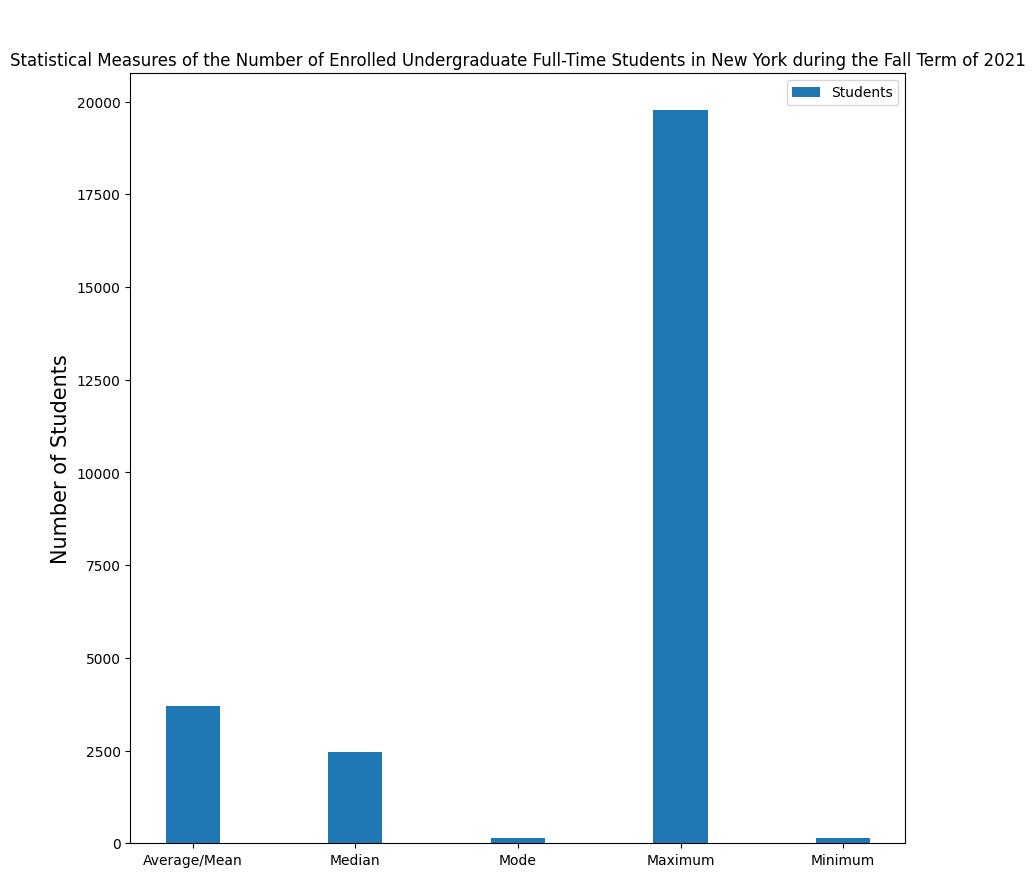

In [21]:
# Obtain graph Values from previous statistical data variables
stat_students = [mean_number_of_students, median_number_of_students, mode_number_of_students, max_number_of_students, min_number_of_students]

# Create a bar graph that displays statiscal data of dataframe
labels = ["Average/Mean", "Median", "Mode", "Maximum", "Minimum"]
stat_fig = plt.figure(figsize=(10,10))
stat_ax = stat_fig.add_subplot()
stat_bars = stat_ax.bar(np.arange(2,len(labels)*3,3), stat_students, width=1)

#Set up titles and labels
stat_ax.set_title("\n\nStatistical Measures of the Number of Enrolled Undergraduate Full-Time Students in New York during the Fall Term of 2021")
stat_ax.set_ylabel("Number of Students", fontsize=15)
stat_ax.set_xticks(np.arange(2,len(labels)*3,3))
stat_ax.set_xticklabels(labels)
stat_ax.legend([stat_bars], ["Students"])



College or Institution Name  Undergraduate Full-Time
               Buffalo Univ                  19773.0
                Stony Brook                  16678.0
                 Binghamton                  13966.0
                     Albany                  11792.0
             Suffolk County                   9333.0
                Farmingdale                   7321.0
                     Nassau                   6931.0
          Fashion Institute                   6875.0
               Cornell Stat                   5933.0
                   Cortland                   5816.0





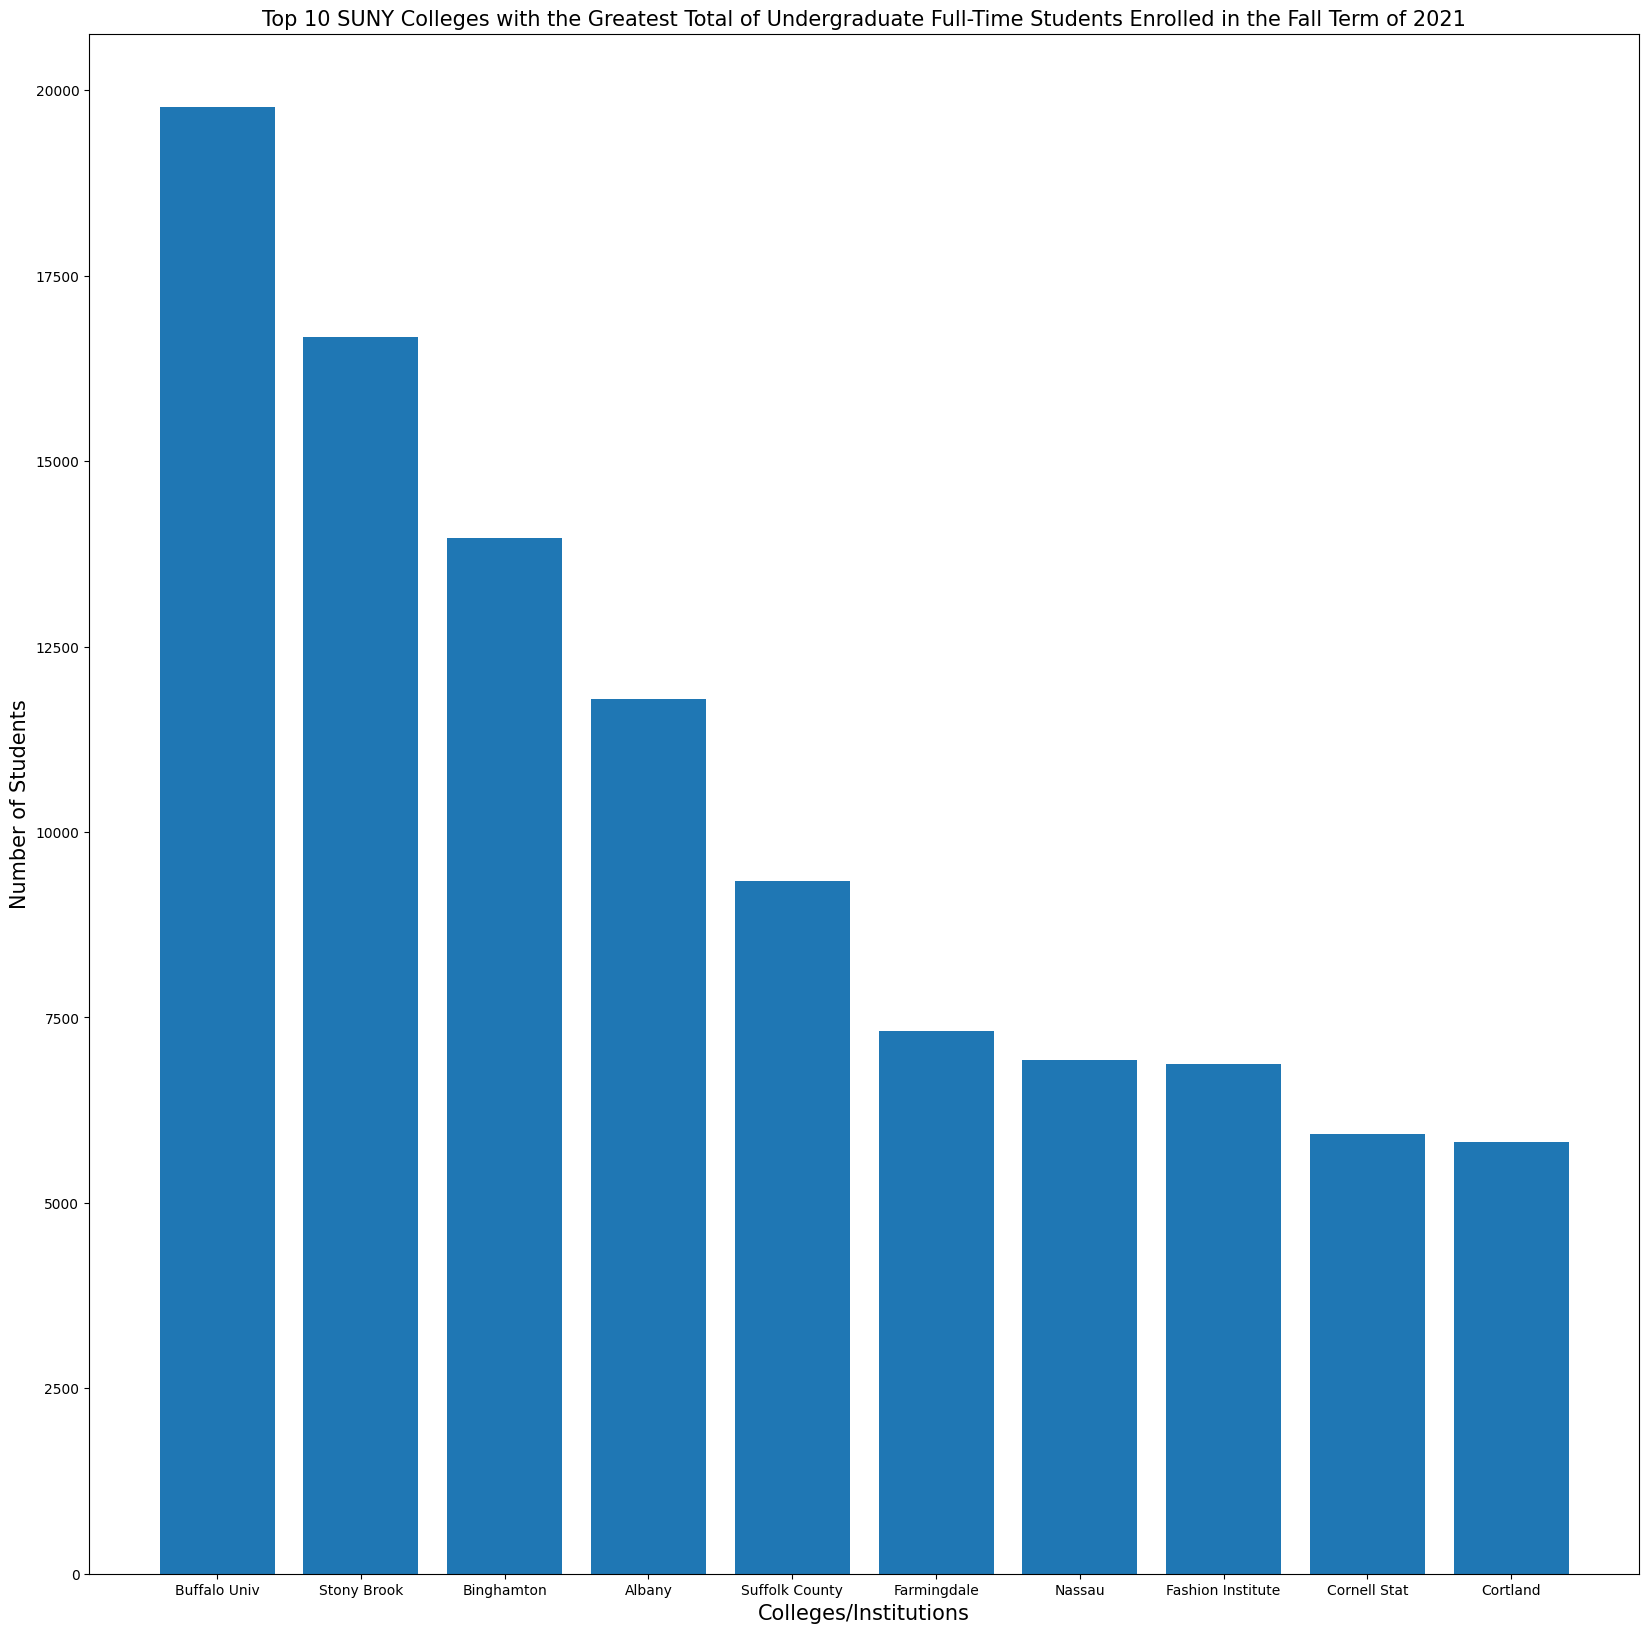

In [23]:
# Create a graph showing the Top 10 Institutions with the Highest # of Undergraduate Full-Time students that attended College in Fall Term of 2021

# Create a separate dataframe using the filtered data
df3 = pd.DataFrame(filtered_data)
df3.drop(["Year", "Term"], axis=1, inplace=True)
df3 = df3.nlargest(10, "Undergraduate Full-Time")
print(df3.to_string(index=False, header=True))
print("\n\n")

# Get x and y values
y3 = df3["College or Institution Name"]
x3 = df3["Undergraduate Full-Time"]

# Increase the size of the figure
plt.figure(figsize=(20,20))

# Create a vertical bar graph with x and y axis determined
plt.bar(y3,x3)
plt.title("Top 10 SUNY Colleges with the Greatest Total of Undergraduate Full-Time Students Enrolled in the Fall Term of 2021", fontsize=15)
plt.xlabel("Colleges/Institutions", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)

plt.show()

College or Institution Name  Undergraduate Full-Time
            Upstate Medical                    131.0
          Downstate Medical                    174.0
                    Clinton                    294.0
            Columbia-Greene                    397.0
            Alfred-Ceramics                    406.0
              North Country                    580.0
            Sullivan County                    583.0
          Fulton-Montgomery                    616.0
              Cayuga County                    832.0
              Ulster County                    973.0





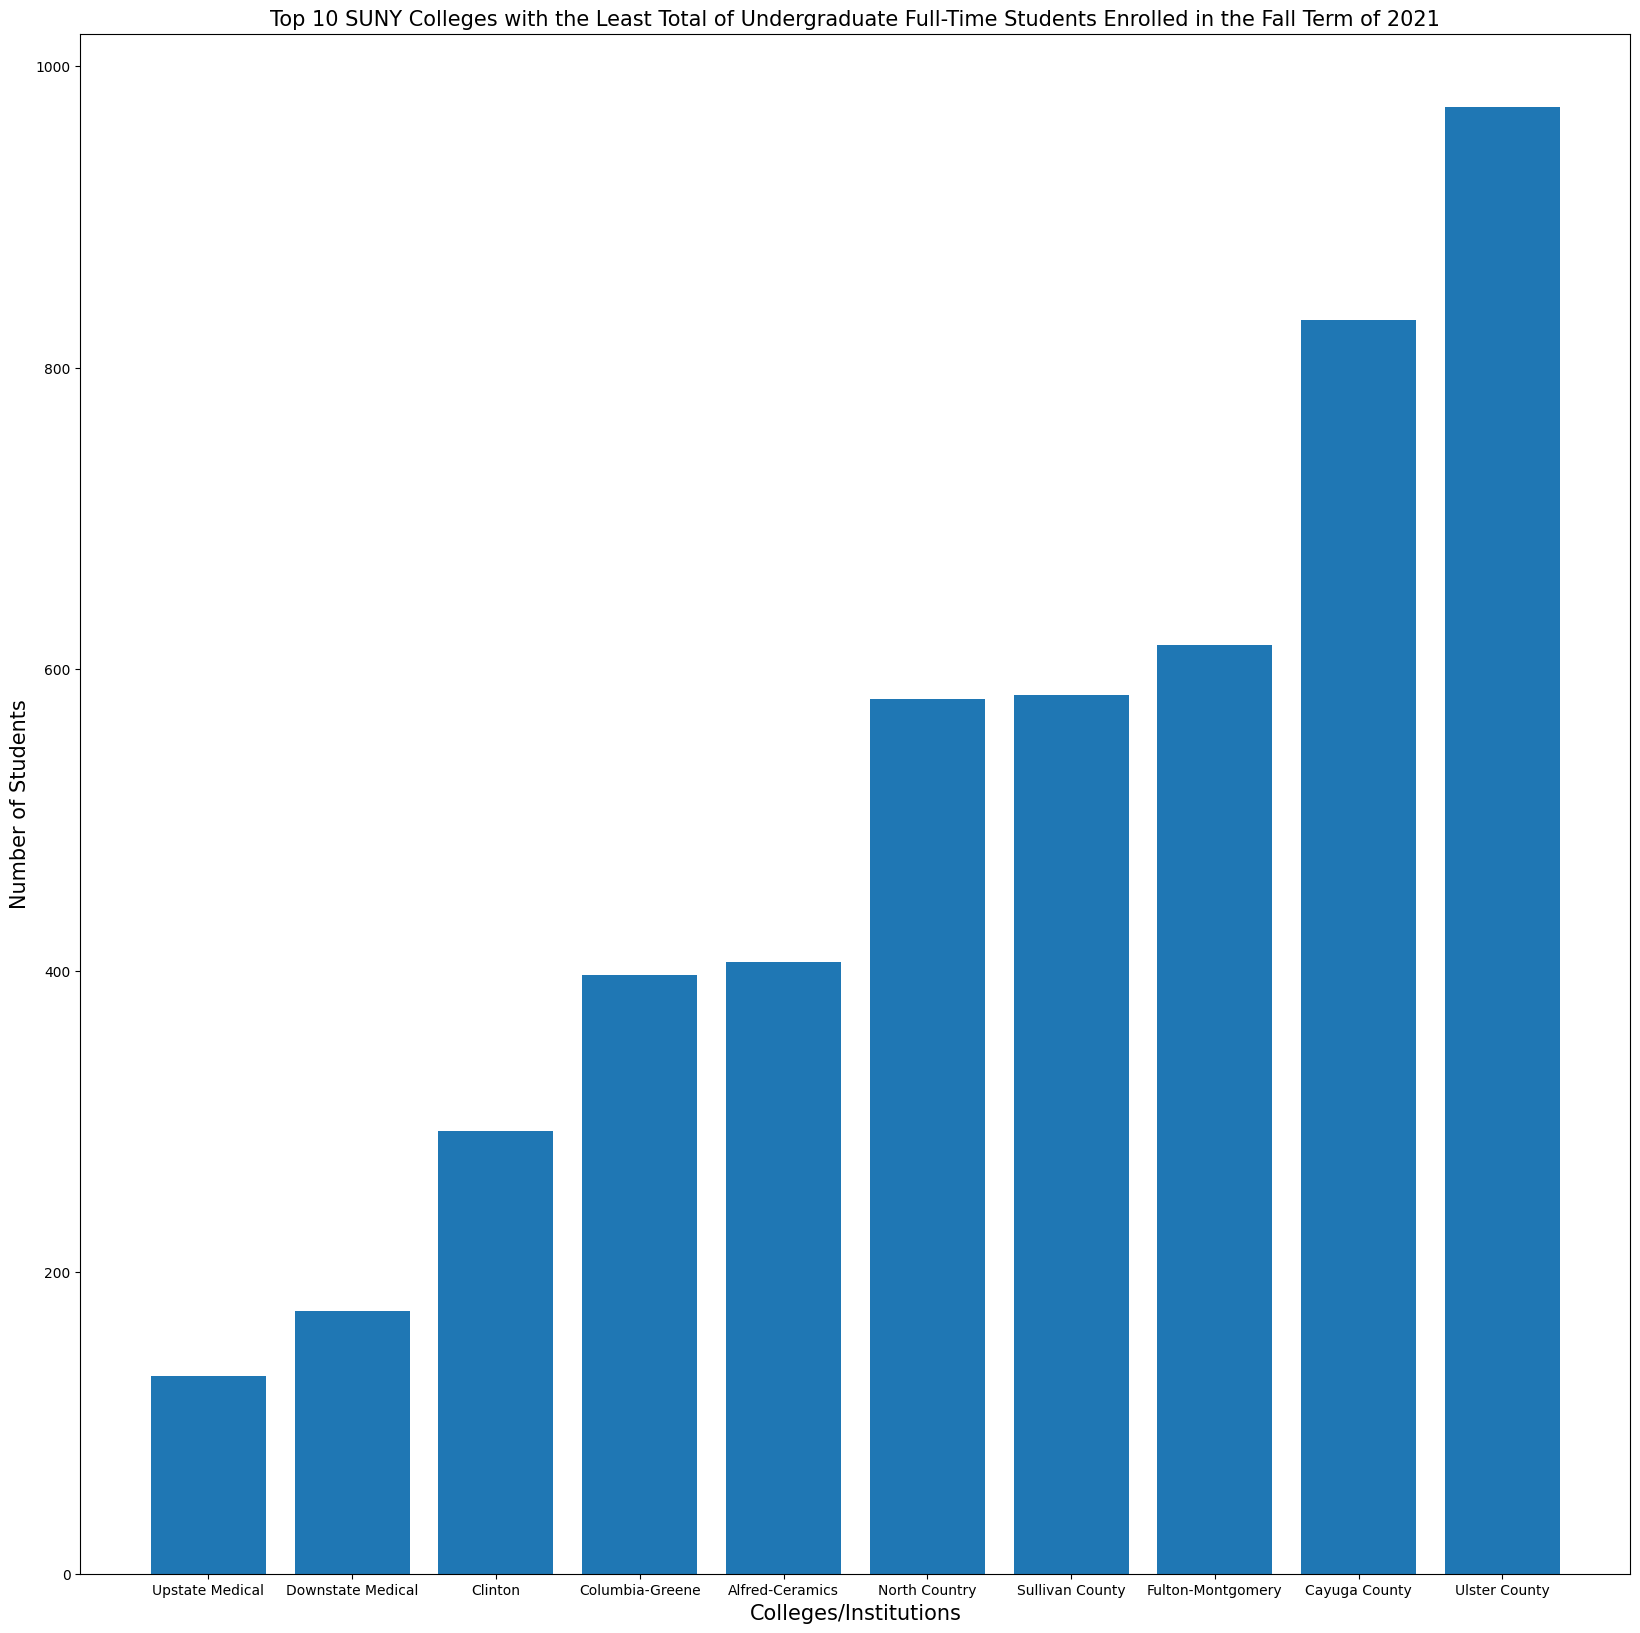

In [24]:
# Create a separate dataframe using the filtered data
df4 = pd.DataFrame(filtered_data)

# Create a graph showing the Top 10 Institutions with the Least # of Undergraduate Full-Time students that attended College in Fall Term of 2021
df4.drop(["Year", "Term"], axis=1, inplace=True)
df4 = df4.nsmallest(10, "Undergraduate Full-Time")
print(df4.to_string(index=False, header=True))
print("\n\n")

# Get x and y values
x4 = df4["Undergraduate Full-Time"]
y4 = df4["College or Institution Name"]

# Increase the size of the figure
plt.figure(figsize=(20,20))

# Create a vertical bar graph with x and y axis determined
plt.bar(y4,x4)
plt.title("Top 10 SUNY Colleges with the Least Total of Undergraduate Full-Time Students Enrolled in the Fall Term of 2021", fontsize=15)
plt.xlabel("Colleges/Institutions", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)

plt.show()

 Year Term College or Institution Name  Undergraduate Full-Time
 2021 Fall                Buffalo Univ                  19773.0
 2020 Fall                Buffalo Univ                  20435.0
 2019 Fall                Buffalo Univ                  20401.0
 2018 Fall                Buffalo Univ                  19941.0
 2017 Fall                Buffalo Univ                  19401.0
 2016 Fall                Buffalo Univ                  18824.0
 2015 Fall                Buffalo Univ                  18452.0
 2014 Fall                Buffalo Univ                  18166.0
 2013 Fall                Buffalo Univ                  18091.0
 2012 Fall                Buffalo Univ                  17766.0
 2011 Fall                Buffalo Univ                  17664.0


 Year Term College or Institution Name  Undergraduate Full-Time
 2021 Fall             Upstate Medical                    131.0
 2020 Fall             Upstate Medical                    145.0
 2019 Fall             Upstate Medical

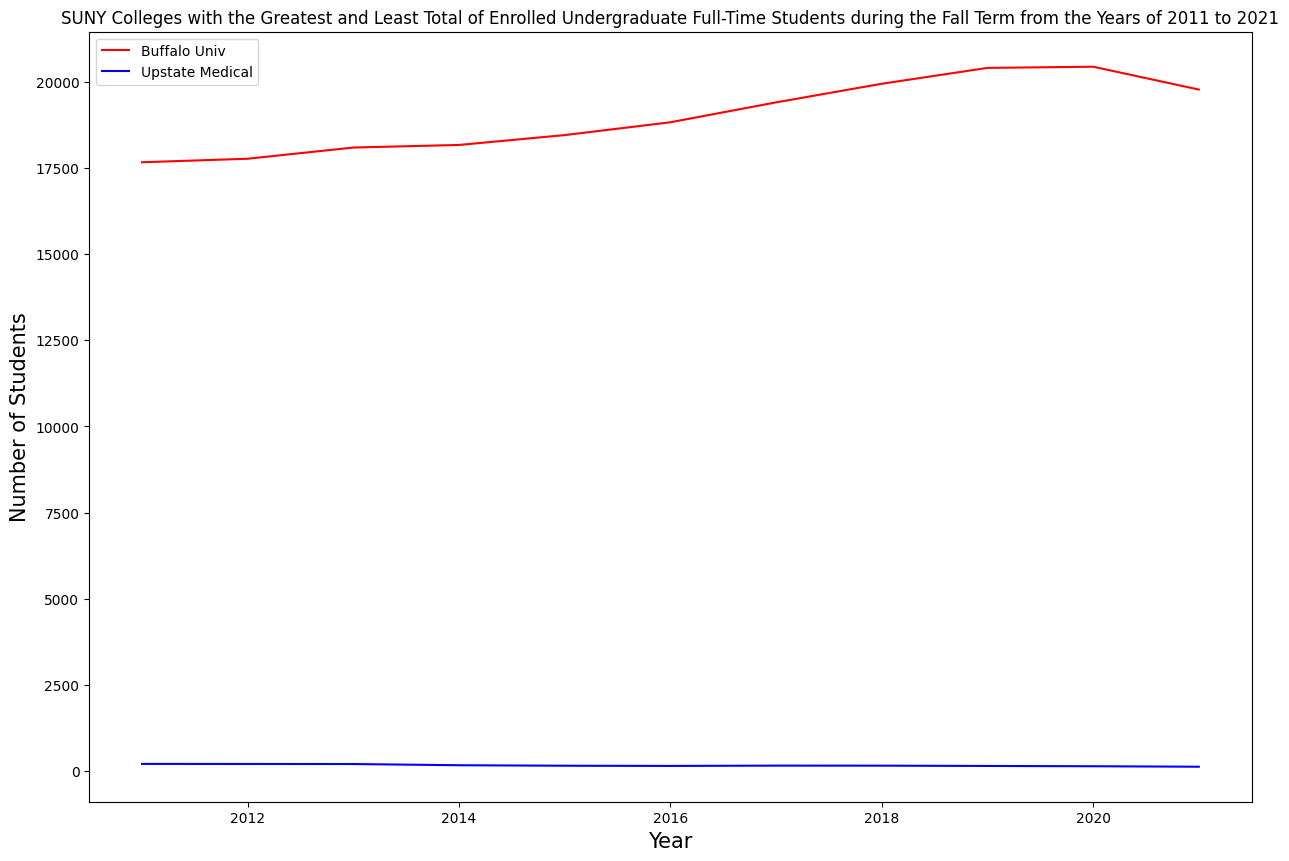

In [26]:
# Create data frames for for the colleges with the least and greatest amount of students emrolled
df5 = pd.DataFrame(original_data)
df6 = pd.DataFrame(original_data)

df5 = df5.loc[df5["College or Institution Name"] == "Buffalo Univ"]
df5.drop(["College or Institution Type", "Undergraduate Part-Time", "Graduate Full-Time", "Graduate Part-Time"], axis=1, inplace=True)

df6 = df6.loc[df6["College or Institution Name"] == "Upstate Medical"]
df6.drop(["College or Institution Type", "Undergraduate Part-Time", "Graduate Full-Time", "Graduate Part-Time"], axis=1, inplace=True)

# Display the Datasets
print(df5.to_string(index=False, header=True))
print("\n")
print(df6.to_string(index=False, header=True))
print("\n\n")

# Increase the size of the figure
plt.figure(figsize=(15,10))

# Plot a line for each two data sets based on the Year (x) by the number of students (y)
plt.plot(df5["Year"], df5["Undergraduate Full-Time"], "-r", label="Buffalo Univ")
plt.plot(df6["Year"], df6["Undergraduate Full-Time"], "-b", label="Upstate Medical")
plt.title("SUNY Colleges with the Greatest and Least Total of Enrolled Undergraduate Full-Time Students during the Fall Term from the Years of 2011 to 2021")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.legend(loc="upper left")
plt.show()